In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob

In [2]:
import palettable

In [3]:
from matplotlib.collections import LineCollection

In [4]:
def cum_hist(data, ax=None, *args, **kwargs):
    """Plot a bin free cummulative histogram

    Parameters
    ----------
    data : array-like
        one dimensional array-like data
    ax : matplotlib Axes Object (optional)
        axes to plot in. If none is given choose the last active one
    *args, **kwargs
        normal matplotlib plotting arguments

    Returns
    -------
    ax : Axes Object
         axes object the plot drawn on
    """
    if ax is None:
        ax = plt.gca()

    data = np.asarray(data)
    if data.ndim != 1:
        raise ValueError("can only process 1D arrays")

    x = np.sort(data)
    y = np.arange(x.size, dtype=float) / x.size
    ax.plot(x, y, *args, **kwargs)
    return ax

In [5]:
stat_files = sorted(glob('T_*/*.stat'))

energies = []
for fn in stat_files:
    energies.append(pd.read_csv(fn).energy.values)
energies = np.asarray(energies)

temps = np.array([int(fn[2:5]) for fn in stat_files])

In [6]:
cum_energies_x = np.sort(energies)
cum_energies_y = np.arange(energies.shape[1], dtype=float) / energies.shape[1]

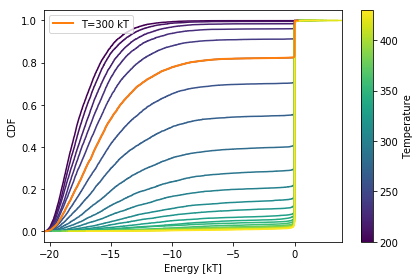

In [15]:
fig, ax = plt.subplots()

ax.set_xlim(np.amin(cum_energies_x), np.amax(cum_energies_x))
ax.set_ylim(-.05, 1.05)
y = cum_energies_y

line_segments = LineCollection([list(zip(x, y)) for x in cum_energies_x], linestyle='solid')
line_segments.set_array(temps)
ax.add_collection(line_segments)
axcb = fig.colorbar(line_segments)
axcb.set_label('Temperature')
plt.sci(line_segments)

id300 = np.where(temps == 250)[0][0]
ax.plot(cum_energies_x[id300], y, lw=2, color='C1', label='T=300 kT')

ax.set(xlabel='Energy [kT]', ylabel='CDF')
ax.legend()


fig.tight_layout()

In [8]:
np.sum(cum_energies_x[id300] < -2) / cum_energies_x[id300].size

0.20517948205179481

In [12]:
energies.shape

(24, 10001)

In [14]:
temps

array([200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320,
       330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430])

In [9]:
!ls

 1q0w_A_B.cplx			     T_230   T_320   T_410
 1Q0W.pdb			     T_240   T_330   T_420
 1q0w.top			     T_250   T_340   T_430
'check energy distributions.ipynb'   T_260   T_350   twoD-1q0w_A_B.o447818
 complexes++			     T_270   T_360   twoD-1q0w_A_B.o447966
 job-script.sh			     T_280   T_370   twoD-1q0w_A_B.o449889
 T_200				     T_290   T_380   twoD-1q0w_A_B.po447818
 T_210				     T_300   T_390   twoD-1q0w_A_B.po447966
 T_220				     T_310   T_400   twoD-1q0w_A_B.po449889
